# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
            
    out = keras.layers.Dense(units=output_units, activation='softmax', name='output')(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LR = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [8]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LR:
    keras.backend.clear_session()
    print('Experiment with LR = %.6f' % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    #opt = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    #opt = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1, decay=0.0)
    #opt = keras.optimizers.Adagrad(lr=0.001, epsilon=1, decay=0.0)
    opt = keras.optimizers.Adam(lr=0.001, epsilon=0.5, decay=0.01)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)
    
    model.fit(x_train, y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test),
              shuffle=True)
    
    #Collect results
    train_loss = model.history.history['loss']
    valid_loss = model.history.history['val_loss']
    train_acc = model.history.history['accuracy']
    valid_acc = model.history.history['val_accuracy']
    
    exp_name_tag = 'exp-lr-%s' % str(lr)
    results[exp_name_tag] = {'train-loss':train_loss,
                             'valid-loss':valid_loss,
                             'train-acc':train_acc,
                             'valid-acc':valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 13s 261us/step - loss: 2.1143 - accuracy: 0.2671 - val_loss: 2.1122 - val_accuracy: 0.2654
Epoch 49/50
50000/50000 [==============================] - 13s 260us/step - loss: 2.1134 - accuracy: 0.2676 - val_loss: 2.1114 - val_accuracy: 0.2656
Epoch 50/50
50000/50000 [==============================] - 13s 262us/step - loss: 2.1126 - accuracy: 0.2680 - val_loss: 2.1106 - val_accuracy: 0.2662
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____________________________________________________

50000/50000 [==============================] - 13s 262us/step - loss: 2.1155 - accuracy: 0.2663 - val_loss: 2.1160 - val_accuracy: 0.2622
Epoch 46/50
50000/50000 [==============================] - 13s 262us/step - loss: 2.1145 - accuracy: 0.2668 - val_loss: 2.1151 - val_accuracy: 0.2627
Epoch 47/50
50000/50000 [==============================] - 13s 265us/step - loss: 2.1136 - accuracy: 0.2670 - val_loss: 2.1141 - val_accuracy: 0.2630
Epoch 48/50
50000/50000 [==============================] - 13s 262us/step - loss: 2.1126 - accuracy: 0.2673 - val_loss: 2.1132 - val_accuracy: 0.2632
Epoch 49/50
50000/50000 [==============================] - 13s 266us/step - loss: 2.1117 - accuracy: 0.2675 - val_loss: 2.1123 - val_accuracy: 0.2637
Epoch 50/50
50000/50000 [==============================] - 13s 265us/step - loss: 2.1109 - accuracy: 0.2677 - val_loss: 2.1115 - val_accuracy: 0.2637
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________

50000/50000 [==============================] - 14s 282us/step - loss: 2.1107 - accuracy: 0.2671 - val_loss: 2.1119 - val_accuracy: 0.2652
Epoch 43/50
50000/50000 [==============================] - 14s 281us/step - loss: 2.1096 - accuracy: 0.2677 - val_loss: 2.1109 - val_accuracy: 0.2654
Epoch 44/50
50000/50000 [==============================] - 14s 279us/step - loss: 2.1086 - accuracy: 0.2680 - val_loss: 2.1099 - val_accuracy: 0.2654
Epoch 45/50
50000/50000 [==============================] - 14s 282us/step - loss: 2.1077 - accuracy: 0.2682 - val_loss: 2.1089 - val_accuracy: 0.2664
Epoch 46/50
50000/50000 [==============================] - 14s 280us/step - loss: 2.1067 - accuracy: 0.2687 - val_loss: 2.1080 - val_accuracy: 0.2666
Epoch 47/50
50000/50000 [==============================] - 14s 281us/step - loss: 2.1058 - accuracy: 0.2687 - val_loss: 2.1071 - val_accuracy: 0.2673
Epoch 48/50
50000/50000 [==============================] - 14s 279us/step - loss: 2.1049 - accuracy: 0.2692 - va

50000/50000 [==============================] - 13s 266us/step - loss: 2.1155 - accuracy: 0.2640 - val_loss: 2.1133 - val_accuracy: 0.2687
Epoch 40/50
50000/50000 [==============================] - 13s 267us/step - loss: 2.1142 - accuracy: 0.2647 - val_loss: 2.1120 - val_accuracy: 0.2697
Epoch 41/50
50000/50000 [==============================] - 13s 265us/step - loss: 2.1130 - accuracy: 0.2657 - val_loss: 2.1108 - val_accuracy: 0.2693
Epoch 42/50
50000/50000 [==============================] - 13s 264us/step - loss: 2.1118 - accuracy: 0.2658 - val_loss: 2.1096 - val_accuracy: 0.2706
Epoch 43/50
50000/50000 [==============================] - 13s 265us/step - loss: 2.1107 - accuracy: 0.2666 - val_loss: 2.1085 - val_accuracy: 0.2708
Epoch 44/50
50000/50000 [==============================] - 13s 266us/step - loss: 2.1096 - accuracy: 0.2671 - val_loss: 2.1074 - val_accuracy: 0.2711
Epoch 45/50
50000/50000 [==============================] - 13s 265us/step - loss: 2.1085 - accuracy: 0.2678 - va

50000/50000 [==============================] - 13s 266us/step - loss: 2.1108 - accuracy: 0.2674 - val_loss: 2.1102 - val_accuracy: 0.2679
Epoch 37/50
50000/50000 [==============================] - 13s 270us/step - loss: 2.1095 - accuracy: 0.2679 - val_loss: 2.1089 - val_accuracy: 0.2687
Epoch 38/50
50000/50000 [==============================] - 13s 266us/step - loss: 2.1083 - accuracy: 0.2683 - val_loss: 2.1077 - val_accuracy: 0.2696
Epoch 39/50
50000/50000 [==============================] - 13s 268us/step - loss: 2.1071 - accuracy: 0.2691 - val_loss: 2.1066 - val_accuracy: 0.2694
Epoch 40/50
50000/50000 [==============================] - 13s 269us/step - loss: 2.1060 - accuracy: 0.2694 - val_loss: 2.1054 - val_accuracy: 0.2689
Epoch 41/50
50000/50000 [==============================] - 13s 268us/step - loss: 2.1048 - accuracy: 0.2697 - val_loss: 2.1043 - val_accuracy: 0.2691
Epoch 42/50
50000/50000 [==============================] - 13s 268us/step - loss: 2.1038 - accuracy: 0.2700 - va

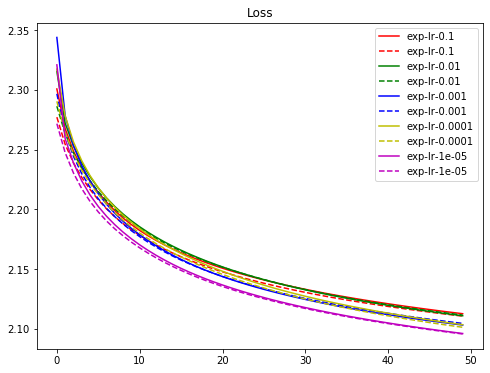

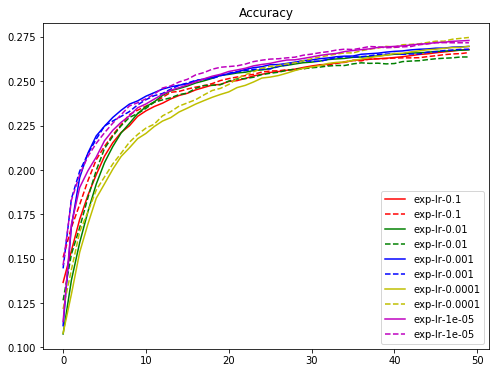

In [9]:
"""
將實驗結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ['r', 'g', 'b', 'y', 'm', 'k']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()